In [ ]:
# capstone project

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\Documents\\sri devi files\\data (1).csv")


In [14]:
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [15]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [13]:
df.tail()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [16]:
df.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

In [17]:

print(df.shape)
print(df.info)

(944, 10)
<bound method DataFrame.info of      footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]>


In [37]:
print(df.describe())

          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.0

In [38]:
print(df.describe())

          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.0

In [39]:
print(df.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [48]:
# if nulls are present
df.fillna(df.mean(), inplace=True)


Logistic Regression Evaluation:
[[100  10]
 [  7  72]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.88      0.91      0.89        79

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189

ROC-AUC Score: 0.9102416570771001

Random Forest Evaluation:
[[102   8]
 [  6  73]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       110
           1       0.90      0.92      0.91        79

    accuracy                           0.93       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.93      0.93       189

ROC-AUC Score: 0.9256616800920598
Accuracy: 0.91005291005291


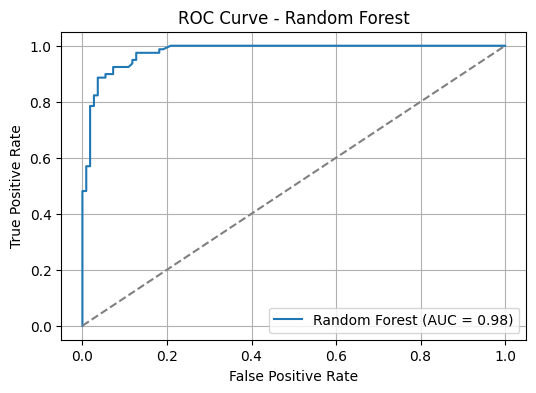

In [54]:
# Machine Learning Code for Predicting Machine Failures 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df=pd.read_csv("C:\\Users\\DELL\\Documents\\sri devi files\\data (1).csv") # Update path if needed

# Features and Target
X = df.drop('fail', axis=1)
y = df['fail']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1️⃣ Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# 2️⃣ Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
print("Accuracy:", accuracy_score(y_test, log_preds))

# Optional: Plot ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# python code for visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_14048\1514763219.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y=feature, data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14048\1514763219.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y=feature, data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14048\1514763219.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y=feature, data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14048\1514763219.py:22: Fut

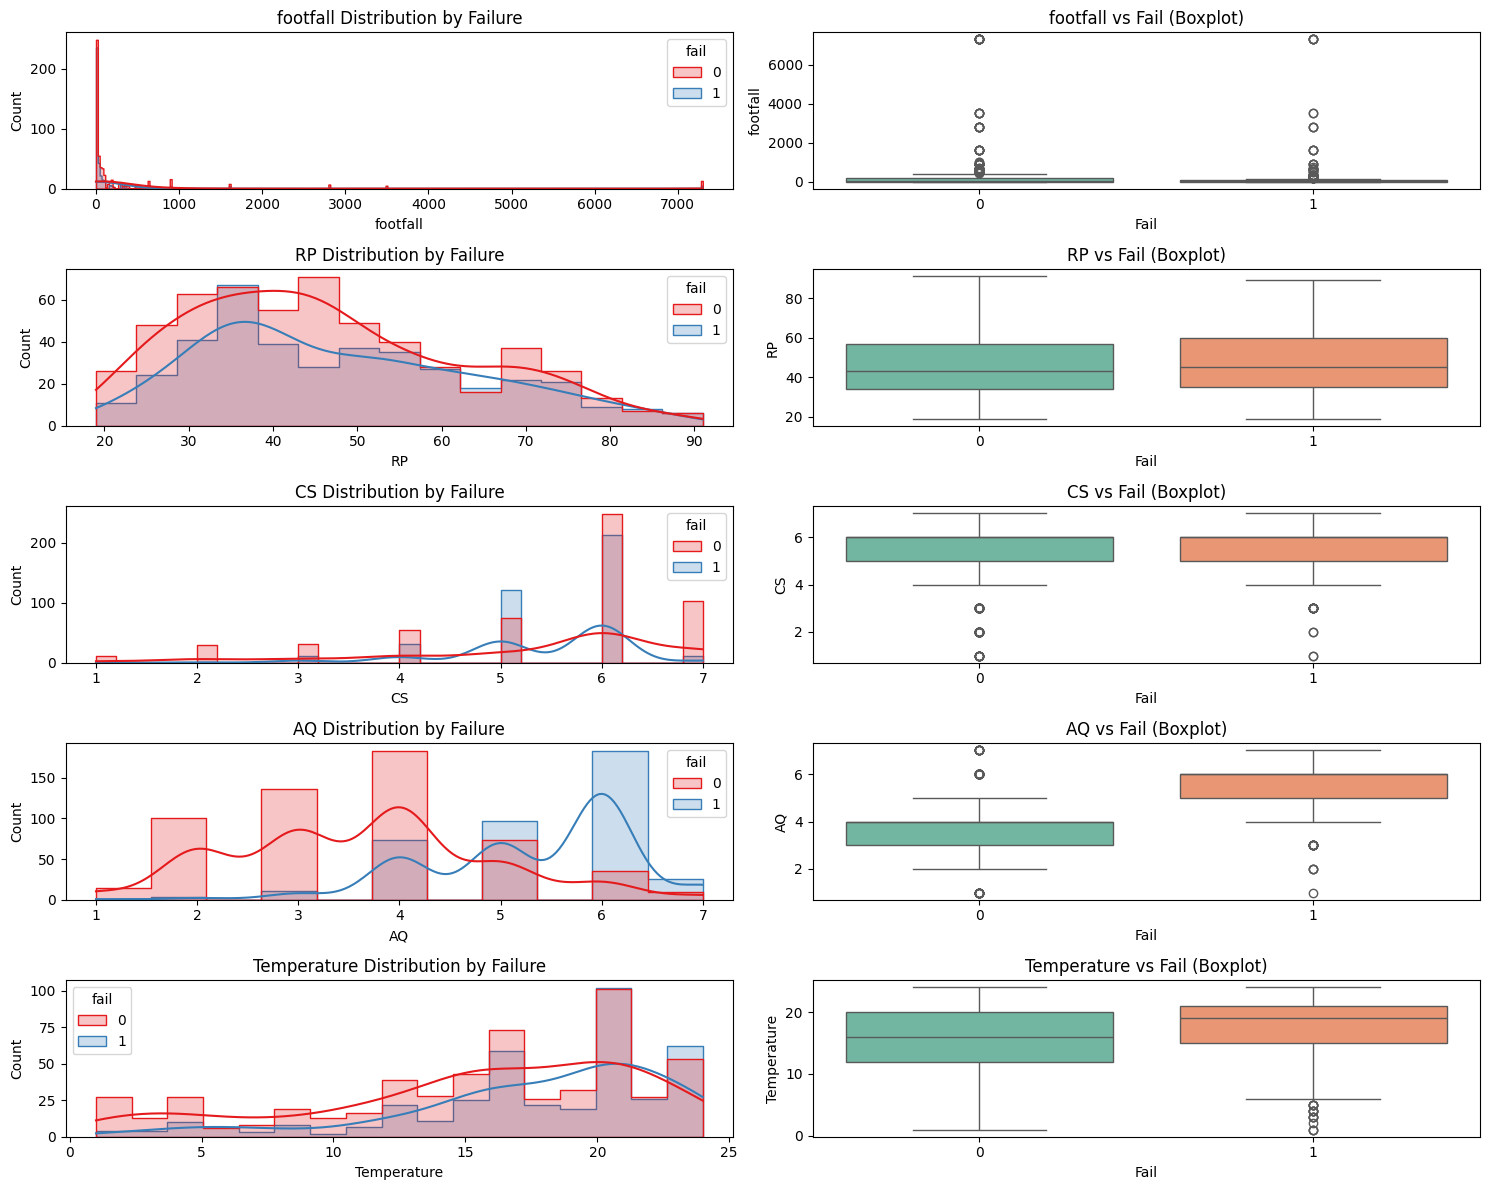

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
df = pd.read_csv("C:\\Users\\DELL\\Documents\\sri devi files\\data (1).csv")  # Use your actual file path

# Define selected features for visualization
features = ['footfall', 'RP', 'CS', 'AQ', 'Temperature']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    # Distribution plot
    plt.subplot(len(features), 2, 2*i+1)
    sns.histplot(data=df, x=feature, hue='fail', kde=True, element='step', palette='Set1')
    plt.title(f'{feature} Distribution by Failure')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(len(features), 2, 2*i+2)
    sns.boxplot(x='fail', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Fail (Boxplot)')
    plt.xlabel('Fail')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [53]:
# logistic Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
print("Accuracy:", accuracy_score(y_test, log_preds))



Logistic Regression Evaluation:
Confusion Matrix:
 [[100  10]
 [  7  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.88      0.91      0.89        79

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189

ROC-AUC Score: 0.9102416570771001

Random Forest Evaluation:
Confusion Matrix:
 [[102   8]
 [  6  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       110
           1       0.90      0.92      0.91        79

    accuracy                           0.93       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.93      0.93       189

ROC-AUC Score: 0.9256616800920598
Accuracy: 0.91005291005291


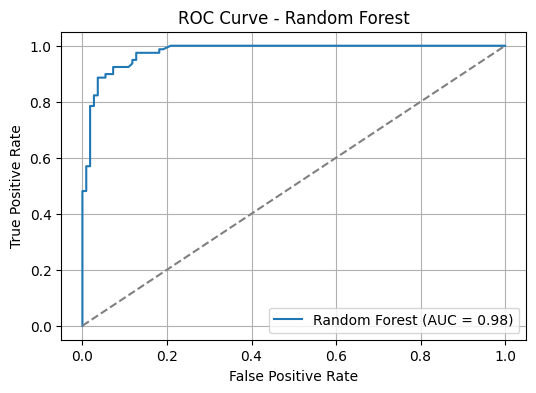

In [59]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


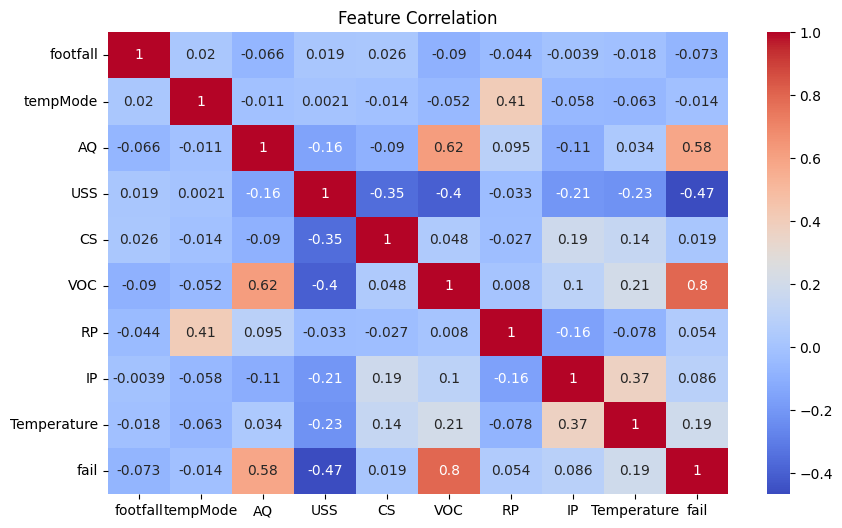

In [25]:
# correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [45]:
# feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


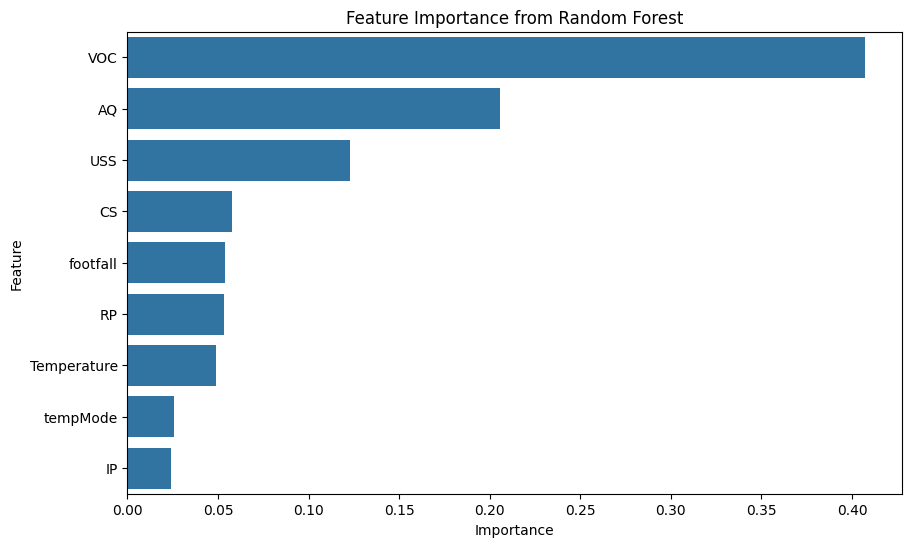

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()


In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [61]:
print(X_train.shape, y_train.shape)


(755, 9) (755,)


In [67]:
print(xgb_preds[:5])  # Print first 5 predictions


[1 0 1 1 0]


In [63]:
# Required imports and using xgboost method
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier

# Replace with your actual data loading
# df = pd.read_csv("your_data.csv")
# Check column name first
print(df.columns)

# Assuming the label column is 'fail'
X = df.drop('fail', axis=1)
y = df['fail']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Results
print("First 5 Predictions:", xgb_preds[:5])
print("\nXGBoost Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("\nClassification Report:\n", classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')
First 5 Predictions: [1 0 1 1 0]

XGBoost Results:
Confusion Matrix:
 [[88 14]
 [13 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       102
           1       0.84      0.85      0.85        87

    accuracy                           0.86       189
   macro avg       0.86      0.86      0.86       189
weighted avg       0.86      0.86      0.86       189

Accuracy: 0.8571428571428571


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [64]:
print(xgb_preds[:5]) 

[1 0 1 1 0]


In [58]:
print("Code executed successfully.")

Code executed successfully.


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=1)

In [66]:
results = {
    "Model": ["Logistic Regression", "XGBoost", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, log_preds),
        accuracy_score(y_test, xgb_preds),
        accuracy_score(y_test, rf_preds)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.423280
1              XGBoost  0.857143
2        Random Forest  0.407407
